In [93]:
import warnings

warnings.filterwarnings('ignore')

In [94]:
import pandas as pd

df = pd.read_csv("D:\Machine Learning\housing.data", delim_whitespace=True, header=None)

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


linear regression


In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [97]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.5441462975864797

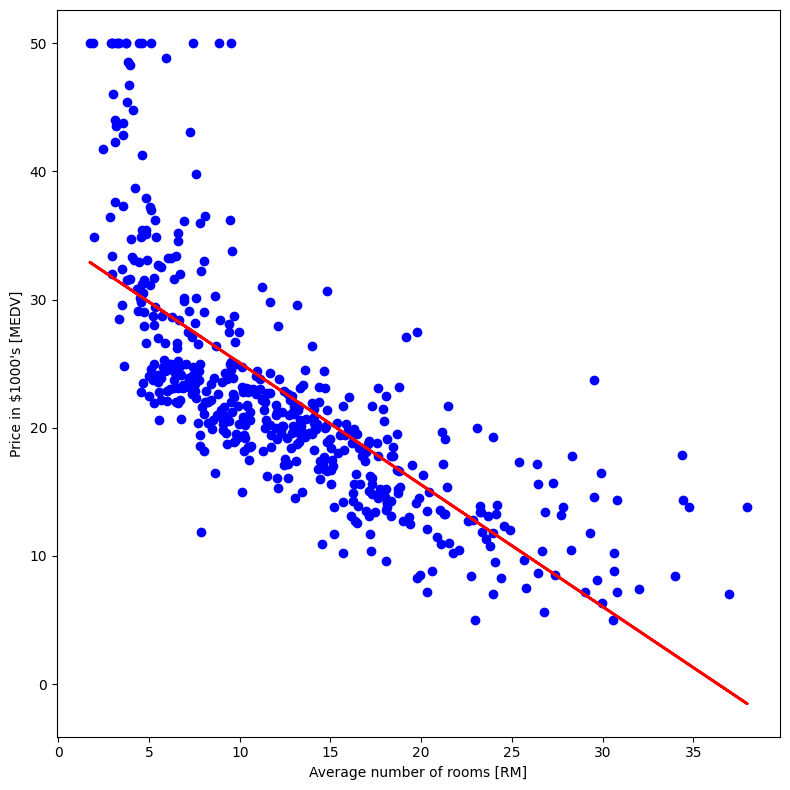

In [98]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(8,8))
plt.scatter(X, y, c='blue')
plt.plot(X, model.predict(X), color='red', linewidth=2)    
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
plt.show()

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [101]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [102]:
import numpy as np

print ('Residual sum of squares Train: %.2f' % np.mean((model.predict(X_train)- y_train) ** 2))
print ('Residual sum of squares Test: %.2f' % np.mean((model.predict(X_test)- y_test) ** 2))

Residual sum of squares Train: 37.93
Residual sum of squares Test: 39.82


logistic regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Create binary target
y_binary = (y > np.median(y)).astype(int)

# Use only the 'AGE' column for features
X_age = df[['AGE']]  # Double brackets to keep DataFrame structure

# Split data using the 'AGE' feature
X_train_age, X_test_age, y_train, y_test = train_test_split(
    X_age, y_binary, test_size=0.2, random_state=42
)

# Train a new model on 'AGE' only
logistic_model_age = LogisticRegression(max_iter=1000)
logistic_model_age.fit(X_train_age, y_train)

# Predict using the 'AGE' model
y_test_pred_logistic_age = logistic_model_age.predict(X_test_age)

# Evaluation
accuracy_age = accuracy_score(y_test, y_test_pred_logistic_age)
conf_matrix_age = confusion_matrix(y_test, y_test_pred_logistic_age)
class_report_age = classification_report(y_test, y_test_pred_logistic_age)

print(f"Accuracy for 'AGE' feature: {accuracy_age}")
print("Confusion Matrix:")
print(conf_matrix_age)
print("Classification Report:")
print(class_report_age)

Accuracy for 'AGE' feature: 0.7843137254901961
Confusion Matrix:
[[46 14]
 [ 8 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        60
           1       0.71      0.81      0.76        42

    accuracy                           0.78       102
   macro avg       0.78      0.79      0.78       102
weighted avg       0.79      0.78      0.79       102



In [104]:
# If AGE is the only feature:
X = df[['AGE']]
y = (df['MEDV'] > df['MEDV'].median()).astype(int)  # Convert to binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print("Predicted values:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Predicted values: [0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1
 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0]
Accuracy: 0.743421052631579
Confusion Matrix:
 [[66 26]
 [13 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.77        92
           1       0.64      0.78      0.71        60

    accuracy                           0.74       152
   macro avg       0.74      0.75      0.74       152
weighted avg       0.76      0.74      0.75       152



naive bayes

In [105]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

gnb_accuracy = gnb_model.score(X_test, y_test)
print(f"Gaussian Naive Bayes Model Accuracy: {gnb_accuracy}")

Gaussian Naive Bayes Model Accuracy: 0.7697368421052632


In [106]:
import pandas as pd

df = pd.read_csv("D:\Machine Learning\housing.data", delim_whitespace=True, header=None)

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(df['MEDV'])

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64
